In [1]:
import pandas as pd

In [2]:
target_dir = "ann_training90"

In [3]:
# Train data
df_train = pd.read_csv("train.csv")
df_train.shape

(3070, 117)

In [4]:
# Test data
df_test = pd.read_csv("test.csv")
df_test.shape

(24122, 116)

In [5]:
# Labeled data
df = pd.read_csv("{}/df.csv".format(target_dir))
df.shape

/home/mantydze/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (119,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(26739, 122)

In [6]:
# Anomalous data
df_anomalies = pd.read_csv("{}/df_anomalies.csv".format(target_dir))
df_anomalies.shape

(453, 122)

In [7]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
palette=["red", "green", "orange"]


def do_tsne_3d(df=None, ignore_y=False):    
    
    # Filter list of columns which will be used for training
    bin_cols = [col for col in df.columns if 'bin_' in col]

    # remove first and last values as those are over/under flows
    bin_cols = bin_cols[1:-1]

    X = df.filter(bin_cols, axis=1).copy().div(df.entries, axis=0)

    if ignore_y:
        y = [2 for _ in range(len(df))]
    else:
        y = df["y"]
    

    tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
    
    colors = [palette[y_] for y_ in y]
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=30)
    ax.scatter(*zip(*tsne), c=colors)
    plt.show()  


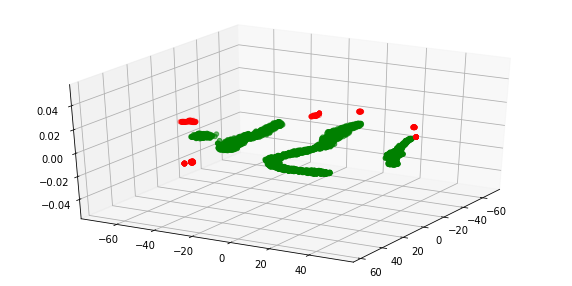

In [8]:
do_tsne_3d(df_train)

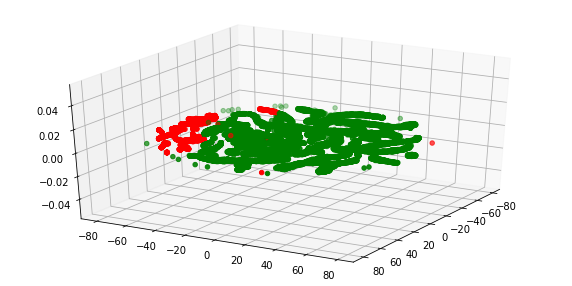

In [9]:
do_tsne_3d(df)